In [26]:
import pandas as pd

# Path to your Excel file
file_path = 'Scenario Data Set.xlsx'

# Read the Excel file
df = pd.read_excel(file_path, sheet_name=1)

# Display the first few rows of the DataFrame
print(df.head())


   student_id     CAMPUS  residency_az  gender_f  \
0        1405  Flagstaff             1         1   
1        2564  Flagstaff             1         0   
2        3329  Flagstaff             1         0   
3        4712  Flagstaff             1         1   
4        2712  Flagstaff             1         1   

                  IPEDSEthnicity  soc  CoreGPA  fall_earned_hrs  fall_sem_gpa  \
0  American Indian/Alaska Native    1     3.53               14          3.79   
1                Hispanic/Latino    1     3.17               13          2.77   
2  American Indian/Alaska Native    1     2.87               14          2.93   
3                          White    0     3.50               16          4.00   
4                          White    0     3.90               12          4.00   

   FallProbation  ...  spr_cum_gpa        AcademicStanding  ret_1  ret_2  \
0  Good Standing  ...         3.59  Good Academic Standing      1      1   
1  Good Standing  ...         2.73  Good Academi

Based on the data set, I answered the following research question:

Does the Academic Success initiative have a positive, negative, or no effect on participants' academic performance, progress, or retention after controlling for academic preparation and demographic characteristics?  
Data prep and cleaning
Exploratory Data Analysis
key performance indicators beyond persistence?
What potential factors could contribute to the persistence rate for students?



**Demographic factors**: gender_f, residency_az, IPEDSEthnicity, ur_minority, soc

**Academic preparation**: CoreGPA

**Academic performance**: fall_sem_gpa, spr_sem_gpa, spr_cum_gpa

**ASC participation**: asc_outreach, asc_ment

**Other relevant factors**: fall_earned_hrs, spr_earned_hrs, AcademicLevelBeginofTerm, AcademicLevelEndofTerm, fall_prob, spr_prob

In [5]:
df.columns

Index(['student_id', 'CAMPUS', 'residency_az', 'gender_f', 'IPEDSEthnicity',
       'soc', 'CoreGPA', 'fall_earned_hrs', 'fall_sem_gpa', 'FallProbation',
       'fall_prob', 'spr_earned_hrs', 'spr_sem_gpa', 'spr_cum_gpa',
       'AcademicStanding', 'ret_1', 'ret_2', 'AcademicLevelBeginofTerm',
       'AcademicLevelEndofTerm', 'asc_outreach', 'asc_ment', 'ur_minority',
       'soph_level'],
      dtype='object')

In [6]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4743 entries, 0 to 4742
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   student_id                4743 non-null   int64  
 1   CAMPUS                    4743 non-null   object 
 2   residency_az              4743 non-null   int64  
 3   gender_f                  4743 non-null   int64  
 4   IPEDSEthnicity            4743 non-null   object 
 5   soc                       4743 non-null   int64  
 6   CoreGPA                   4563 non-null   float64
 7   fall_earned_hrs           4743 non-null   int64  
 8   fall_sem_gpa              4743 non-null   float64
 9   FallProbation             4710 non-null   object 
 10  fall_prob                 4743 non-null   int64  
 11  spr_earned_hrs            4743 non-null   int64  
 12  spr_sem_gpa               4743 non-null   float64
 13  spr_cum_gpa               4743 non-null   float64
 14  Academic

In [10]:
df.shape

(4743, 23)

In [27]:
print(df.isnull().sum())

student_id                    0
CAMPUS                        0
residency_az                  0
gender_f                      0
IPEDSEthnicity                0
soc                           0
CoreGPA                     180
fall_earned_hrs               0
fall_sem_gpa                  0
FallProbation                33
fall_prob                     0
spr_earned_hrs                0
spr_sem_gpa                   0
spr_cum_gpa                   0
AcademicStanding            765
ret_1                         0
ret_2                         0
AcademicLevelBeginofTerm      4
AcademicLevelEndofTerm        4
asc_outreach                  0
asc_ment                      0
ur_minority                   0
soph_level                    0
dtype: int64


In [8]:
df['CoreGPA'].unique()

array([3.53, 3.17, 2.87, 3.5 , 3.9 , 3.07, 3.85, 3.89, 2.97, 2.88, 4.  ,
       3.78, 3.22, 2.7 , 3.86, 3.77, 3.39, 3.69, 3.38, 3.15, 3.09, 3.  ,
       3.21, 3.72,  nan, 3.66, 3.81, 3.1 , 3.8 , 3.44, 3.93, 3.7 , 3.65,
       3.56, 3.91, 3.52, 3.84, 3.71, 3.73, 3.03, 3.83, 3.94, 3.59, 3.4 ,
       3.87, 3.27, 3.64, 3.97, 3.88, 3.63, 3.42, 3.31, 2.91, 3.13, 3.43,
       3.47, 3.75, 3.04, 3.62, 3.58, 3.68, 3.16, 3.96, 3.28, 3.41, 3.6 ,
       3.2 , 3.92, 3.25, 3.06, 3.79, 3.34, 3.35, 3.3 , 3.57, 3.82, 2.72,
       3.95, 3.54, 3.19, 3.29, 3.67, 2.89, 3.37, 3.45, 3.23, 3.33, 2.62,
       2.12, 2.86, 2.96, 2.95, 2.79, 2.56, 3.61, 3.46, 2.94, 3.18, 3.24,
       3.14, 3.55, 2.93, 3.32, 2.92, 3.36, 3.12, 3.08, 2.5 , 2.84, 3.76,
       1.97, 2.9 , 3.26, 2.81, 3.74, 2.98, 2.74, 3.11, 2.31, 3.05, 2.67,
       2.53, 2.58, 4.13, 2.64, 2.73, 3.48, 2.78, 2.76, 2.54, 2.8 , 2.63,
       2.75, 2.66, 2.34, 4.57, 2.77, 2.57, 2.69, 2.83, 2.82])

In [9]:
df['AcademicStanding'].unique()

array(['Good Academic Standing', nan, 'Continuing Probation'],
      dtype=object)

In [11]:
df['FallProbation'].unique()

array(['Good Standing', 'Probation', nan, 'Suspended',
       'Continue Probation'], dtype=object)

While handling missing values
When data is normally distributed(with minimal outliers) the null values can be replaced with mean

When data is skewed then null replaced with median

When data is categorical then replace with mode


---



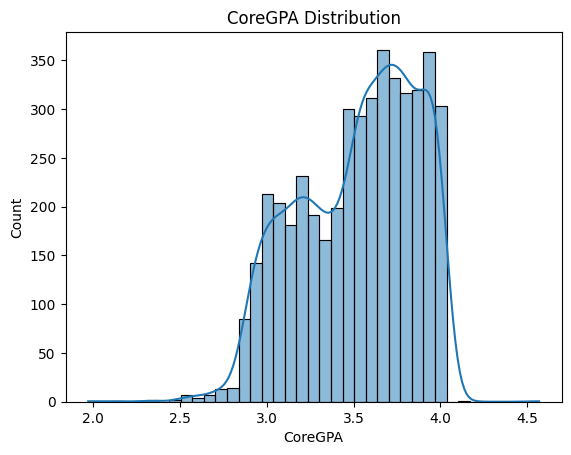

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df['CoreGPA'].dropna(), kde=True)
plt.title('CoreGPA Distribution')
plt.show()


In [29]:
print(df['CoreGPA'].describe())
print("Skewness:", df['CoreGPA'].skew())
print("Mode:", df['CoreGPA'].mode()[0])


count    4563.000000
mean        3.524578
std         0.337594
min         1.970000
25%         3.250000
50%         3.580000
75%         3.810000
max         4.570000
Name: CoreGPA, dtype: float64
Skewness: -0.4427625499019705
Mode: 4.0


In [14]:
print(df['AcademicStanding'].value_counts())


AcademicStanding
Good Academic Standing    3920
Continuing Probation        58
Name: count, dtype: int64


In [15]:
print(df['FallProbation'].value_counts())


FallProbation
Good Standing         4139
Probation              567
Suspended                3
Continue Probation       1
Name: count, dtype: int64



**For Numerical Columns (CoreGPA):**
If Skewness is close to 0 and the distribution looks normal, we will use mean.
If Skewness is high and the distribution is skewed, we will use median.

**For Categorical Columns (AcademicStanding, FallProbation):**
Using mode for imputation.

In [30]:
if abs(df['CoreGPA'].skew()) < 0.5:
    df['CoreGPA'].fillna(df['CoreGPA'].mean(), inplace=True)
else:
    df['CoreGPA'].fillna(df['CoreGPA'].median(), inplace=True)


In [31]:
df['AcademicStanding'].fillna(df['AcademicStanding'].mode()[0], inplace=True)
df['FallProbation'].fillna(df['FallProbation'].mode()[0], inplace=True)


In [32]:
print(df.isnull().sum())

student_id                  0
CAMPUS                      0
residency_az                0
gender_f                    0
IPEDSEthnicity              0
soc                         0
CoreGPA                     0
fall_earned_hrs             0
fall_sem_gpa                0
FallProbation               0
fall_prob                   0
spr_earned_hrs              0
spr_sem_gpa                 0
spr_cum_gpa                 0
AcademicStanding            0
ret_1                       0
ret_2                       0
AcademicLevelBeginofTerm    4
AcademicLevelEndofTerm      4
asc_outreach                0
asc_ment                    0
ur_minority                 0
soph_level                  0
dtype: int64


In [33]:
# Handle gender_f column
df['gender_f'].replace(2, pd.NA, inplace=True)
df.dropna(subset=['gender_f'], inplace=True)

In [34]:
df.describe()

,student_id,residency_az,soc,CoreGPA,fall_earned_hrs,fall_sem_gpa,fall_prob,spr_earned_hrs,spr_sem_gpa,spr_cum_gpa,ret_1,ret_2,asc_outreach,asc_ment,ur_minority,soph_level
count,4733.000000,4733.000000,4733.000000,4733.000000,4733.000000,4733.000000,4733.000000,4733.000000,4733.000000,4733.000000,4733.000000,4733.000000,4733.000000,4733.000000,4733.000000,4733.000000
mean,3373.449609,0.647792,0.407564,3.524319,13.729770,3.069768,0.120431,11.154236,2.810729,3.074107,0.924572,0.765054,0.103740,0.006550,0.384112,0.695542
std,1369.763017,0.477709,0.491433,0.331074,3.484823,0.956723,0.325499,5.647159,1.361361,0.937736,0.264108,0.424010,0.304955,0.080674,0.486436,0.460226
min,1003.000000,0.000000,0.000000,1.970000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2187.000000,0.000000,0.000000,3.270000,13.000000,2.690000,0.000000,8.000000,2.290000,2.700000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,3374.000000,1.000000,0.000000,3.560000,15.000000,3.360000,0.000000,13.000000,3.380000,3.350000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
75%,4559.000000,1.000000,1.000000,3.800000,16.000000,3.790000,0.000000,15.000000,3.810000,3.770000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,5745.000000,1.000000,1.000000,4.570000,21.000000,4.000000,1.000000,22.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

# Encode categorical variables
df = pd.get_dummies(df, columns=['CAMPUS', 'IPEDSEthnicity', 'FallProbation', 'AcademicStanding', 'AcademicLevelBeginofTerm', 'AcademicLevelEndofTerm'], drop_first=True)

# Normalize numerical variables
scaler = StandardScaler()
df[['CoreGPA', 'fall_sem_gpa', 'spr_sem_gpa', 'spr_cum_gpa', 'fall_earned_hrs', 'spr_earned_hrs']] = scaler.fit_transform(df[['CoreGPA', 'fall_sem_gpa', 'spr_sem_gpa', 'spr_cum_gpa', 'fall_earned_hrs', 'spr_earned_hrs']])

# Summary statistics
print(df.describe())



        student_id  residency_az          soc       CoreGPA  fall_earned_hrs  \
count  4733.000000   4733.000000  4733.000000  4.733000e+03     4.733000e+03   
mean   3373.449609      0.647792     0.407564 -9.608015e-17     1.381152e-16   
std    1369.763017      0.477709     0.491433  1.000106e+00     1.000106e+00   
min    1003.000000      0.000000     0.000000 -4.695280e+00    -3.940292e+00   
25%    2187.000000      0.000000     0.000000 -7.682470e-01    -2.094358e-01   
50%    3374.000000      1.000000     0.000000  1.077836e-01     3.645420e-01   
75%    4559.000000      1.000000     1.000000  8.327743e-01     6.515309e-01   
max    5745.000000      1.000000     1.000000  3.158786e+00     2.086476e+00   

       fall_sem_gpa    fall_prob  spr_earned_hrs   spr_sem_gpa   spr_cum_gpa  \
count  4.733000e+03  4733.000000    4.733000e+03  4.733000e+03  4.733000e+03   
mean   1.080902e-16     0.120431   -2.402004e-17 -1.621353e-16  2.221853e-16   
std    1.000106e+00     0.325499    1.0

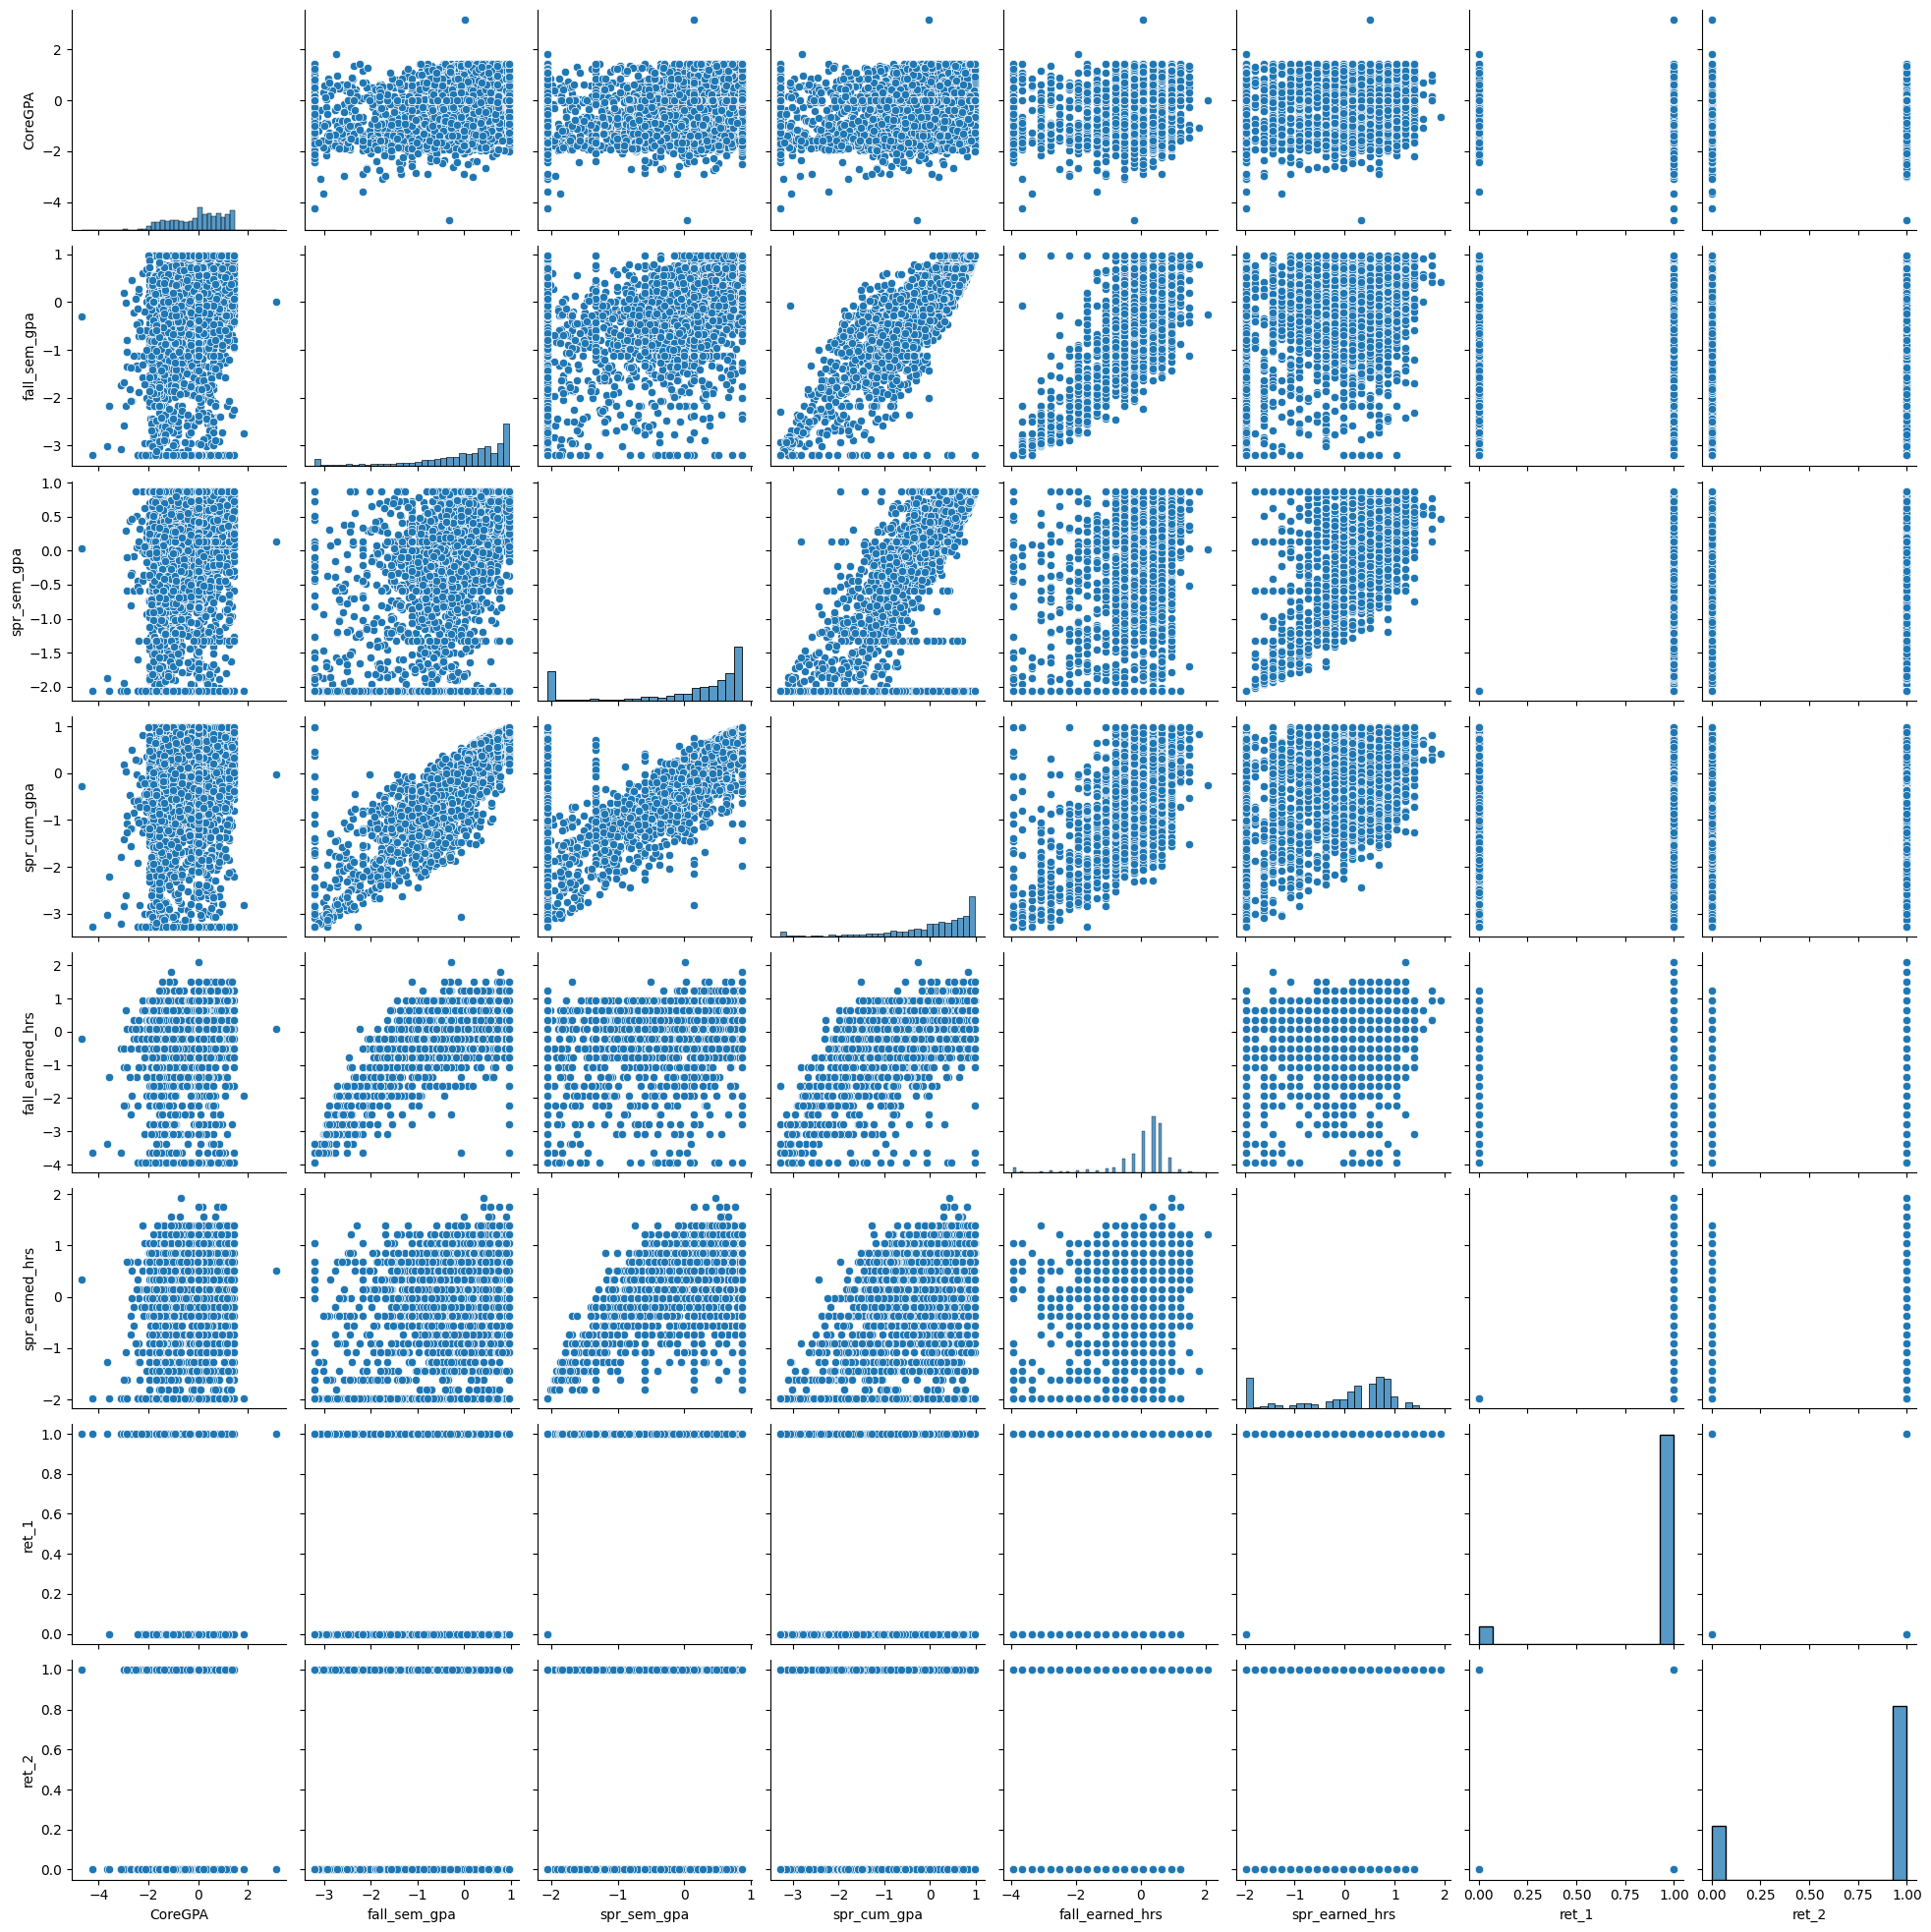

In [36]:
# Visualizations
sns.pairplot(df[['CoreGPA', 'fall_sem_gpa', 'spr_sem_gpa', 'spr_cum_gpa', 'fall_earned_hrs', 'spr_earned_hrs', 'ret_1', 'ret_2']])
plt.show()

In [45]:
# Ensure all columns are numeric
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Convert boolean columns to integers
bool_columns = df.select_dtypes(include='bool').columns
df[bool_columns] = df[bool_columns].astype(int)

# Drop any remaining NaN values again after conversion
df.dropna(inplace=True)


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4733 entries, 0 to 4742
Data columns (total 35 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   student_id                                     4733 non-null   int64  
 1   residency_az                                   4733 non-null   int64  
 2   gender_f                                       4733 non-null   int64  
 3   soc                                            4733 non-null   int64  
 4   CoreGPA                                        4733 non-null   float64
 5   fall_earned_hrs                                4733 non-null   float64
 6   fall_sem_gpa                                   4733 non-null   float64
 7   fall_prob                                      4733 non-null   int64  
 8   spr_earned_hrs                                 4733 non-null   float64
 9   spr_sem_gpa                                    4733 non-n

In [47]:
print(df.dtypes)

student_id                                         int64
residency_az                                       int64
gender_f                                           int64
soc                                                int64
CoreGPA                                          float64
fall_earned_hrs                                  float64
fall_sem_gpa                                     float64
fall_prob                                          int64
spr_earned_hrs                                   float64
spr_sem_gpa                                      float64
spr_cum_gpa                                      float64
ret_1                                              int64
ret_2                                              int64
asc_outreach                                       int64
asc_ment                                           int64
ur_minority                                        int64
soph_level                                         int64
IPEDSEthnicity_Asian           

In [48]:
# Regression analysis
X = df.drop(columns=['student_id', 'ret_1', 'ret_2', 'fall_sem_gpa', 'spr_sem_gpa', 'spr_cum_gpa'])
y = df['spr_cum_gpa']  # Example of using cumulative GPA as the outcome variable

# Add constant term for regression
X = sm.add_constant(X)

# Fit the model
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            spr_cum_gpa   R-squared:                       0.710
Model:                            OLS   Adj. R-squared:                  0.709
Method:                 Least Squares   F-statistic:                     427.3
Date:                Sun, 28 Jul 2024   Prob (F-statistic):               0.00
Time:                        03:07:06   Log-Likelihood:                -3784.0
No. Observations:                4733   AIC:                             7624.
Df Residuals:                    4705   BIC:                             7805.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

**Interpretation:**
R-squared (0.710): This indicates that 71% of the variability in the cumulative GPA at the end of the spring term (spr_cum_gpa) is explained by the independent variables included in the model.

**Adjusted R-squared (0.709):** This value adjusts the R-squared for the number of predictors in the model. It is very close to the R-squared value, suggesting that adding more predictors is still beneficial and not overfitting the model.

**F statistic (427.3) and Prob (F statistic) (0.00):** The high F-statistic and the corresponding p-value of 0.00 indicate that the overall model is statistically significant, meaning that the predictors together explain a significant portion of the variance in spr_cum_gpa.

**Step 1:** Interpret Coefficients and P-values
The coefficients indicate the relationship between each predictor and the dependent variable (spr_cum_gpa). The p-values indicate the statistical significance of each predictor.

Significant Variables (p-value < 0.05):
gender_f: Female students tend to have higher cumulative GPAs.

*   CoreGPA: Higher high school core GPAs are associated with higher cumulative GPAs.
*   fall_earned_hrs and spr_earned_hrs: More earned hours in the fall and spring are associated with higher cumulative GPAs.
*   fall_prob: Higher fall probation values negatively impact cumulative GPA.
*   asc_outreach: Students included in ASC outreach efforts have higher cumulative GPAs.
*   ur_minority: Underrepresented minority status is associated with lower cumulative GPAs.
*   soph_level: Achieving sophomore status is associated with lower cumulative GPAs.
*   IPEDSEthnicity_Asian, IPEDSEthnicity_Black/African American, IPEDSEthnicity_Hispanic/Latino, IPEDSEthnicity_Native Hawaiian/Oth Pac Island, *   IPEDSEthnicity_Two or More: Various ethnicities have different impacts on cumulative GPA.
*   FallProbation_Good Standing: Students on good standing after probation have higher cumulative GPAs.
*   AcademicStanding_Good Academic Standing: Good academic standing is associated with lower cumulative GPAs.
*   AcademicLevelEndofTerm_Junior, AcademicLevelEndofTerm_Senior, AcademicLevelEndofTerm_Sophomore: Academic level at the end of the term has a positive impact on cumulative GPA.

In [49]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(vif_data)


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


                                          Feature         VIF
0                                           const    0.000000
1                                    residency_az    1.309992
2                                        gender_f    1.055526
3                                             soc         inf
4                                         CoreGPA    1.483041
5                                 fall_earned_hrs    2.123442
6                                       fall_prob         inf
7                                  spr_earned_hrs    1.476363
8                                    asc_outreach    1.275267
9                                        asc_ment    1.017625
10                                    ur_minority         inf
11                                     soph_level  276.335816
12                           IPEDSEthnicity_Asian         inf
13          IPEDSEthnicity_Black/African American    2.102970
14                 IPEDSEthnicity_Hispanic/Latino    8.814011
15      

The Variance Inflation Factor (VIF) analysis indicates multicollinearity issues among some of the predictors, as shown by VIF values significantly higher than 10 or even infinity (inf). This suggests that some predictors are highly correlated, which can distort the regression results.

Addressing Multicollinearity
To address multicollinearity, we can take several steps:

Remove Highly Correlated Predictors: Drop predictors with extremely high VIF values.
Combine Categories: Consider combining categories that might be highly correlated.


In [50]:
# Drop predictors with the highest VIF values iteratively
columns_to_drop = ['soc', 'fall_prob', 'ur_minority', 'IPEDSEthnicity_Asian', 'IPEDSEthnicity_White',
                   'FallProbation_Good Standing', 'FallProbation_Probation', 'AcademicLevelEndofTerm_Sophomore']

# Drop columns with high VIF
X_reduced = X.drop(columns=columns_to_drop)

# Recalculate VIF for reduced model
vif_data_reduced = pd.DataFrame()
vif_data_reduced["Feature"] = X_reduced.columns
vif_data_reduced["VIF"] = [variance_inflation_factor(X_reduced.values, i) for i in range(len(X_reduced.columns))]

print(vif_data_reduced)


                                          Feature        VIF
0                                           const  92.000043
1                                    residency_az   1.300542
2                                        gender_f   1.053407
3                                         CoreGPA   1.448350
4                                 fall_earned_hrs   1.407091
5                                  spr_earned_hrs   1.467814
6                                    asc_outreach   1.251046
7                                        asc_ment   1.016287
8                                      soph_level   1.781531
9           IPEDSEthnicity_Black/African American   1.046434
10                 IPEDSEthnicity_Hispanic/Latino   1.129232
11                   IPEDSEthnicity_International   1.351249
12  IPEDSEthnicity_Native Hawaiian/Oth Pac Island   1.008416
13                   IPEDSEthnicity_Not Specified   1.007574
14                     IPEDSEthnicity_Two or More   1.057726
15                      

In [51]:
# Again Fit the model with reduced predictors
model_reduced = sm.OLS(y, X_reduced).fit()
print(model_reduced.summary())


                            OLS Regression Results                            
Dep. Variable:            spr_cum_gpa   R-squared:                       0.670
Model:                            OLS   Adj. R-squared:                  0.669
Method:                 Least Squares   F-statistic:                     456.0
Date:                Sun, 28 Jul 2024   Prob (F-statistic):               0.00
Time:                        03:20:58   Log-Likelihood:                -4090.4
No. Observations:                4733   AIC:                             8225.
Df Residuals:                    4711   BIC:                             8367.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

**Interpretation of Results**
Significant Predictors:


*   gender_f: Being female has a positive effect on the cumulative GPA.

*   CoreGPA: Core GPA positively influences the spring cumulative GPA.

*  fall_earned_hrs and spr_earned_hrs: Both are significant predictors, indicating that earned hours in both semesters positively impact the cumulative GPA.
*  asc_outreach: Participation in outreach programs positively affects the cumulative GPA.
*  soph_level: Sophomore level at the end of the term positively influences the cumulative GPA.
*  IPEDSEthnicity_Hispanic/Latino: Being Hispanic/Latino has a negative effect on the cumulative GPA.
*  IPEDSEthnicity_Not Specified: Not specifying ethnicity has a negative effect on the cumulative GPA.
*  AcademicStanding_Good Academic Standing: Good academic standing positively influences the cumulative GPA.
*  AcademicLevelEndofTerm_Junior: Being a junior at the end of the term positively affects the cumulative GPA.



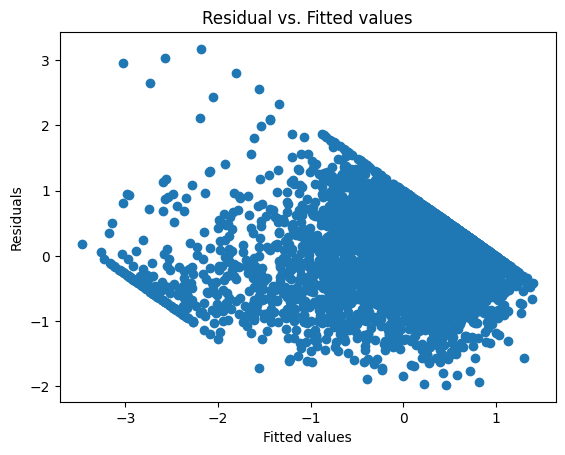

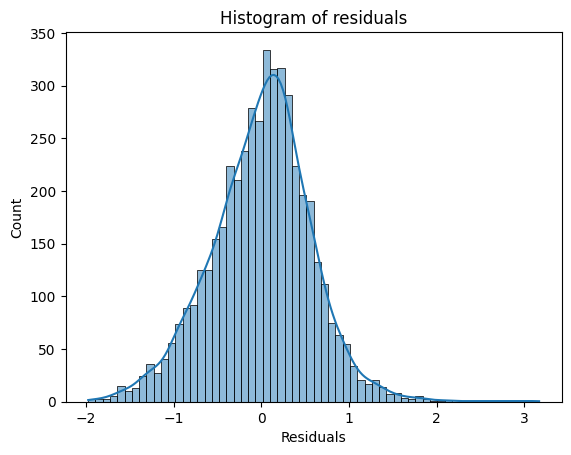

Breusch-Pagan test p-value: 1.5749298518568696e-91
Mean Squared Error: 0.3092316313004299
R-squared: 0.689161013166258


In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.diagnostic import het_breuschpagan
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Residual plot
plt.scatter(model_reduced.fittedvalues, model_reduced.resid)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residual vs. Fitted values')
plt.show()

# Histogram of residuals
sns.histplot(model_reduced.resid, kde=True)
plt.xlabel('Residuals')
plt.title('Histogram of residuals')
plt.show()

# Breusch-Pagan test for heteroscedasticity
_, pval, _, _ = het_breuschpagan(model_reduced.resid, model_reduced.model.exog)
print(f'Breusch-Pagan test p-value: {pval}')

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

# Fit the model on the training data
model_train = sm.OLS(y_train, X_train).fit()

# Predict on the testing data
y_pred = model_train.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Interpretation of Diagnostic and Validation Results
Breusch-Pagan Test:

The Breusch-Pagan test p-value is extremely low (1.5749298518568696e-91), indicating significant heteroscedasticity in the model. This suggests that the residuals' variance is not constant, which violates one of the key assumptions of OLS regression.

Mean Squared Error (MSE):

The MSE on the test set is 0.3092316313004299. This is a measure of the average squared difference between the observed and predicted values. Lower values indicate better model performance.

R-squared on Test Data:

The R-squared value on the test data is 0.689161013166258, indicating that the model explains approximately 68.92% of the variance in the cumulative GPA on the test data. This is close to the R-squared value obtained on the training data, suggesting that the model generalizes reasonably well.

Given the significant heteroscedasticity, you should consider addressing it to improve the model's reliability. Here are some steps you can take:
Weighted Least Squares (WLS):

 WLS regression, which can handle heteroscedasticity by assigning weights to observations based on the variance of the errors.

In [55]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Fit the model using WLS
weights = 1 / model_reduced.resid**2  # Example weights; you may need to adjust based on residuals
model_wls = sm.WLS(y, X_reduced, weights=weights).fit()

print(model_wls.summary())

# Check VIF to ensure no multicollinearity
vif_data = pd.DataFrame()
vif_data["Feature"] = X_reduced.columns
vif_data["VIF"] = [variance_inflation_factor(X_reduced.values, i) for i in range(len(X_reduced.columns))]

print(vif_data)

# Evaluate the model on the test set
y_pred_wls = model_wls.predict(X_test)

mse_wls = mean_squared_error(y_test, y_pred_wls)
r2_wls = r2_score(y_test, y_pred_wls)

print(f'WLS Mean Squared Error: {mse_wls}')
print(f'WLS R-squared: {r2_wls}')


                            WLS Regression Results                            
Dep. Variable:            spr_cum_gpa   R-squared:                       1.000
Model:                            WLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.483e+06
Date:                Sun, 28 Jul 2024   Prob (F-statistic):               0.00
Time:                        03:30:41   Log-Likelihood:                -772.45
No. Observations:                4733   AIC:                             1587.
Df Residuals:                    4712   BIC:                             1723.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

In [56]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# Standardize the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_reduced)

# Fit Ridge regression model
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_scaled, y)

# Cross-validation
cv_scores = cross_val_score(ridge_model, X_scaled, y, cv=5)
print(f'Ridge Cross-Validation R-squared: {cv_scores.mean()}')

# Evaluate on test set
X_test_scaled = scaler.transform(X_test)
y_pred_ridge = ridge_model.predict(X_test_scaled)

mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f'Ridge Mean Squared Error: {mse_ridge}')
print(f'Ridge R-squared: {r2_ridge}')


Ridge Cross-Validation R-squared: 0.6542105283543358
Ridge Mean Squared Error: 0.30508261930161606
Ridge R-squared: 0.6933315913204035


Ridge Regression Results
Cross-Validation R-squared:

The cross-validation R-squared of 0.6542 indicates that the Ridge regression model explains approximately 65.42% of the variance in the dependent variable (spr_cum_gpa) during cross-validation. This is a good indication that the model is generalizing well to unseen data.
Mean Squared Error:

The Mean Squared Error (MSE) of 0.3051 is slightly lower than the MSE from the initial OLS model (0.3092), suggesting that the Ridge regression model has a better fit with less error.
R-squared:

The R-squared of 0.6933 indicates that the Ridge regression model explains about 69.33% of the variance in spr_cum_gpa on the test set. This is close to the R-squared value obtained from the initial OLS model but slightly lower, which is expected as Ridge regression penalizes the size of coefficients to prevent overfitting.
Interpretation
Generalization: The Ridge regression model has a good balance between bias and variance, as indicated by the cross-validation R-squared. This suggests that the model is less likely to overfit the training data compared to the initial OLS model.
Performance: The slight reduction in MSE and high R-squared values indicate that the Ridge model performs well in predicting the dependent variable, making it a reliable model for this dataset.


In [57]:
# Hyperparameter Tuning with Grid Search

from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {'alpha': [0.01, 0.1, 1.0, 10.0, 100.0]}

# Instantiate the Ridge regression model
ridge = Ridge()

# Perform grid search
grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring='r2')
grid_search.fit(X_scaled, y)

# Best parameter
print(f'Best alpha: {grid_search.best_params_["alpha"]}')

# Best cross-validation R-squared
print(f'Best Cross-Validation R-squared: {grid_search.best_score_}')

# Evaluate on test set with best parameter
best_ridge = grid_search.best_estimator_
y_pred_best_ridge = best_ridge.predict(X_test_scaled)

mse_best_ridge = mean_squared_error(y_test, y_pred_best_ridge)
r2_best_ridge = r2_score(y_test, y_pred_best_ridge)

print(f'Best Ridge Mean Squared Error: {mse_best_ridge}')
print(f'Best Ridge R-squared: {r2_best_ridge}')


Best alpha: 100.0
Best Cross-Validation R-squared: 0.6561419486713218
Best Ridge Mean Squared Error: 0.3051135653186486
Best Ridge R-squared: 0.6933004844490253


**Interpretation**
Best Alpha (λ = 100.0): This is the regularization strength that provided the best trade-off between bias and variance. It indicates a strong regularization effect, meaning the model coefficients are significantly shrunk towards zero to prevent overfitting.

Best Cross-Validation R-squared (0.6561): This value represents how well the model performs on unseen data during cross-validation. An R-squared of 0.6561 indicates that the model explains about 65.61% of the variance in the target variable (spring cumulative GPA) based on the input features.

Best Ridge Mean Squared Error (MSE = 0.3051): This metric measures the average squared difference between the observed actual outcomes and the outcomes predicted by the model. A lower MSE indicates a better fit. In this case, the MSE of 0.3051 suggests that the model has a relatively small prediction error.

Best Ridge R-squared (0.6933): This value represents the proportion of the variance in the dependent variable that is predictable from the independent variables. An R-squared of 0.6933 means that approximately 69.33% of the variance in the spring cumulative GPA can be explained by the model.

**Why These Results Matter**
Model Performance: The R-squared and MSE values suggest that the ridge regression model with an alpha of 100.0 is robust and performs well, striking a good balance between underfitting and overfitting.

Generalization: The cross-validation R-squared value demonstrates that the model generalizes well to new, unseen data, which is crucial for making reliable predictions in real-world scenarios.

Stability: The use of ridge regression and the selected alpha value ensure that the model coefficients are not overly sensitive to small changes in the data, making the model more stable and less prone to overfitting.

In [65]:
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score

# Assuming df is your DataFrame and 'spr_cum_gpa' is the target variable
X = df.drop(columns=['spr_cum_gpa'])
y = df['spr_cum_gpa']

# Handle missing values by imputing them
imputer = SimpleImputer(strategy='mean')  # You can change strategy to 'median', 'most_frequent', or 'constant'
X_imputed = imputer.fit_transform(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit Ridge regression model with cross-validation
ridge_cv = Ridge(alpha=1.0)
ridge_cv.fit(X_train_scaled, y_train)

# Cross-validation
cv_scores = cross_val_score(ridge_cv, X_train_scaled, y_train, cv=5)
print(f'Ridge Cross-Validation R-squared: {cv_scores.mean()}')

# Evaluate on test set
y_pred_ridge = ridge_cv.predict(X_test_scaled)

mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f'Ridge Mean Squared Error: {mse_ridge}')
print(f'Ridge R-squared: {r2_ridge}')

# Predict GPA for the entire dataset
df_c = df.copy()
df_c['predicted_gpa'] = ridge_cv.predict(scaler.transform(imputer.transform(X)))



Ridge Cross-Validation R-squared: 0.917710077651823
Ridge Mean Squared Error: 0.06640874485544228
Ridge R-squared: 0.9332460690358313


In [67]:
#Check Prediction for first few rows


print(df_c[['student_id', 'spr_cum_gpa', 'predicted_gpa']].head())


   student_id  spr_cum_gpa  predicted_gpa
0        1405     0.550205       0.566015
1        2564    -0.366994      -0.323076
2        3329    -1.540156      -0.952714
3        4712     0.880823       0.974126
4        2712     0.987474       1.019457
